# The Spark Foundations || Data Science And Business Analytics

# Exploratory Data Analysis - Indian Premium League (Task 5) 

## Objective:

- To find out the most successful teams, players and factors contributing win or loss of a team.
- Suggesting most winning teams for a company to endorse for its products

### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

### Loading the data files

In [2]:
df_deliveries=pd.read_csv('deliveries.csv')
df_deliveries=df_deliveries[df_deliveries['is_super_over']==0]
df_deliveries['wicket']=(df_deliveries['player_dismissed'].notnull()).astype('int')
df_deliveries=df_deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_deliveries=df_deliveries.replace('Delhi Daredevils','Delhi Capitals')

In [3]:
matches = pd.read_csv('matches.csv',index_col='id')

### Viewing The First Five Elements Of The given Two Data Frames 

In [4]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,0


In [5]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Getting the information about the data types of each features and null_count

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

### Defining a function to get the count of the missing values and the percentage of missing values

In [7]:
def missing_values_df(df):
    missing_values=df.isnull().sum()
    missing_percent = (df.isnull().sum()*100)/len(df)
    missing_values_percent = pd.concat([missing_values,missing_percent],axis=1)
    missing_values_percent.sort_values(by=1,ascending=False,inplace=True)
    missing_values_percent.reset_index(inplace=True)
    missing_values_percent.columns=['Column','Missing columns count','Missing %']
    return missing_values_percent

In [8]:
missing_values_df(df_deliveries)

,Column,Missing columns count,Missing %
0,fielder,172557,96.402174
1,dismissal_kind,170177,95.072543
2,player_dismissed,170177,95.072543
3,match_id,0,0.000000
4,inning,0,0.000000
5,total_runs,0,0.000000
6,extra_runs,0,0.000000
7,batsman_runs,0,0.000000
8,penalty_runs,0,0.000000
9,noball_runs,0,0.000000


### Droping the columns which has more than 70% of missing values

In [9]:
df_deliveries.drop(columns = ['fielder','dismissal_kind','player_dismissed'], axis = 1,inplace = True)

In [10]:
missing_values_df(df_deliveries)

,Column,Missing columns count,Missing %
0,match_id,0,0.0
1,wide_runs,0,0.0
2,total_runs,0,0.0
3,extra_runs,0,0.0
4,batsman_runs,0,0.0
5,penalty_runs,0,0.0
6,noball_runs,0,0.0
7,legbye_runs,0,0.0
8,bye_runs,0,0.0
9,is_super_over,0,0.0


In [11]:
missing_values_df(matches)

,Column,Missing columns count,Missing %
0,umpire3,637,84.259259
1,city,7,0.925926
2,winner,4,0.529101
3,player_of_match,4,0.529101
4,umpire2,2,0.264550
5,umpire1,2,0.264550
6,venue,0,0.000000
7,win_by_wickets,0,0.000000
8,win_by_runs,0,0.000000
9,season,0,0.000000


In [12]:
matches.drop(columns='umpire3',axis = 1,inplace = True)

In [13]:
missing_values_df(matches)

,Column,Missing columns count,Missing %
0,city,7,0.925926
1,winner,4,0.529101
2,player_of_match,4,0.529101
3,umpire1,2,0.264550
4,umpire2,2,0.264550
5,season,0,0.000000
6,date,0,0.000000
7,team1,0,0.000000
8,team2,0,0.000000
9,toss_winner,0,0.000000


In [14]:
matches.dropna(inplace = True)

In [15]:
missing_values_df(matches)

,Column,Missing columns count,Missing %
0,season,0,0.0
1,city,0,0.0
2,date,0,0.0
3,team1,0,0.0
4,team2,0,0.0
5,toss_winner,0,0.0
6,toss_decision,0,0.0
7,result,0,0.0
8,dl_applied,0,0.0
9,winner,0,0.0


## We have completed the data cleaning part now we are moving towards Data Visualization

### plotting a bar graph for the team who won the match most of the times

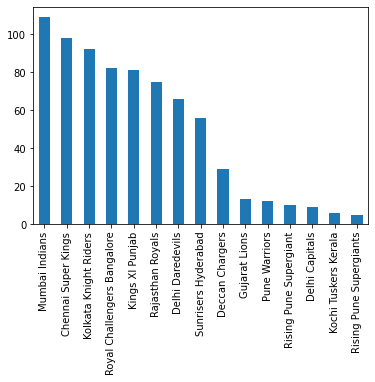

In [16]:
matches.winner.value_counts().plot(kind='bar')

### plotting a bar graph for the top 10 players who won man of the match

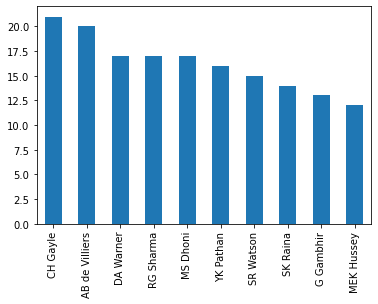

In [17]:
matches.player_of_match.value_counts()[:10].plot(kind='bar')

### plotting a bar graph which team has won the match most of the times

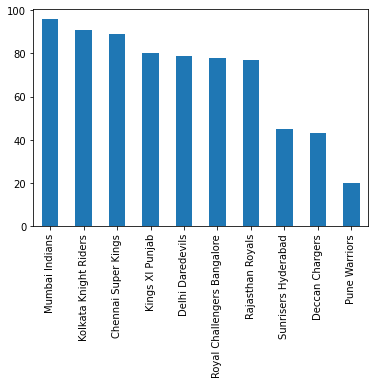

In [18]:
matches.toss_winner.value_counts()[:10].plot(kind='bar')

In [19]:
matches_per_team1=matches.groupby('team2')['team2'].count()
matches_per_team2=matches.groupby('team1')['team1'].count()

matches_per_team=matches_per_team1+matches_per_team2
matches_per_team

team2
Chennai Super Kings            162
Deccan Chargers                 75
Delhi Capitals                  15
Delhi Daredevils               156
Gujarat Lions                   30
Kings XI Punjab                175
Kochi Tuskers Kerala            14
Kolkata Knight Riders          177
Mumbai Indians                 184
Pune Warriors                   45
Rajasthan Royals               144
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    174
Sunrisers Hyderabad            105
dtype: int64

In [20]:
matches_per_season = matches.groupby('season')['season'].count()
matches_per_season

season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    53
2015    57
2016    60
2017    58
2018    60
2019    58
Name: season, dtype: int64

In [21]:
toss_match_winner = matches[matches.toss_winner == matches.winner]

In [22]:
toss_match_winner_season = toss_match_winner.groupby('season')['season'].count()
toss_match_winner_team = toss_match_winner.groupby('winner')['winner'].count()

In [23]:
seasons=matches['season'].unique()
teams=matches['team1'].unique()
seasons=np.sort(seasons)
perc_win=[]

In [24]:
season_colors=['#1997f3','#3d90e2','#5786ce','#707ab6','#8072aa','#976590',
              '#9e6088','#ae5673','#c1475c','#d13d49','#e22d31','#f01917']

### Plotting a bar graph on what percentage of seasonal wins of the team who won the toss

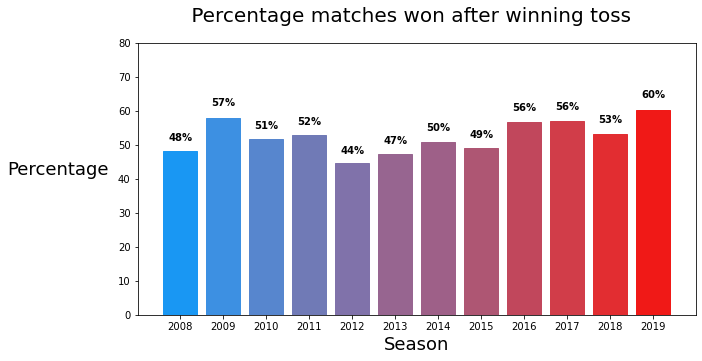

In [25]:
for i in seasons:
    perc_win.append((toss_match_winner_season[i]/matches_per_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,80)
rects=plt.bar(seasons,perc_win)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')
for i in range(12):
    rects[i].set_color(season_colors[i])
    
fig.suptitle(' Percentage matches won after winning toss',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

In [26]:
team_colors={'Sunrisers Hyderabad':'#e86629', 'Mumbai Indians':'#114180', 'Gujarat Lions':'#f7794e',
 'Rising Pune Supergiants':'#4c4776', 'Royal Challengers Bangalore':'#e33323',
 'Kolkata Knight Riders':'#321650', 'Delhi Capitals':'#2560ae', 'Kings XI Punjab':'#df2125',
 'Chennai Super Kings':'#f4e54c', 'Rajasthan Royals':'#e91a84', 'Deccan Chargers':'#283549',
 'Kochi Tuskers Kerala':'#ee6226', 'Pune Warriors':'#56c2d7'}
over_colors=["red","red","red","red","red","red","orange","orange","orange","orange","orange",
            "orange","orange","orange","orange","green","green","green","green","green"]

### Plotting a horizontal bar graph the chances of winning the match after winning the toss

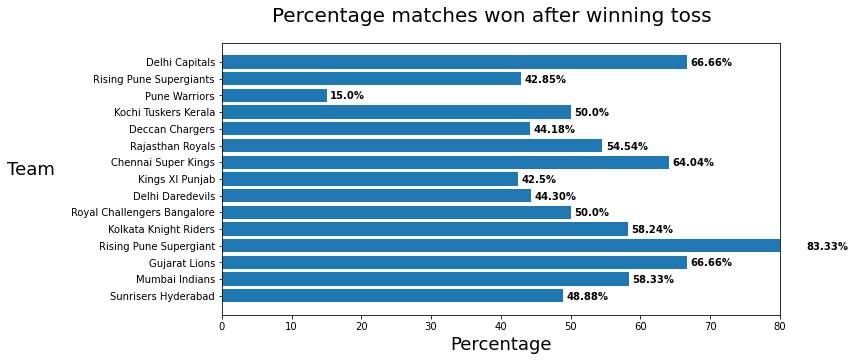

In [27]:

toss_wins=matches.groupby('toss_winner')['toss_winner'].count()
perc_win=[]
for i in teams:
    perc_win.append((toss_match_winner_team[i]/toss_wins[i])*100)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,80)
rects=plt.barh(teams,perc_win)

for i, v in enumerate(perc_win):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage matches won after winning toss',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)



plt.show()

### Plotting a bar graph for each season on what perectange seasonal wins for the teams who won the toss and choose to bat

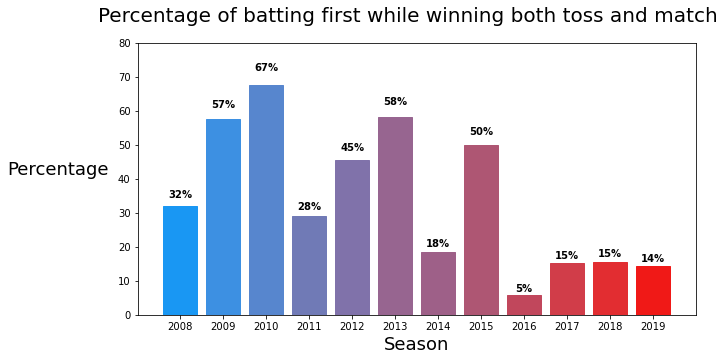

In [28]:
toss_batting_first=matches[(matches['toss_winner']==matches['winner']) & (matches['toss_decision']=='bat')]
toss_batting_first_season=toss_batting_first.groupby('season')['season'].count()
win_perc=[]

for i in seasons:
    win_perc.append((toss_batting_first_season[i]/toss_match_winner_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,80)
rects=plt.bar(seasons,win_perc)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')
for i in range(12):
    rects[i].set_color(season_colors[i])
    
fig.suptitle('Percentage of batting first while winning both toss and match',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

### Plotting a bar graph for each season on what perectange seasonal wins for the teams who won the toss and choose to field

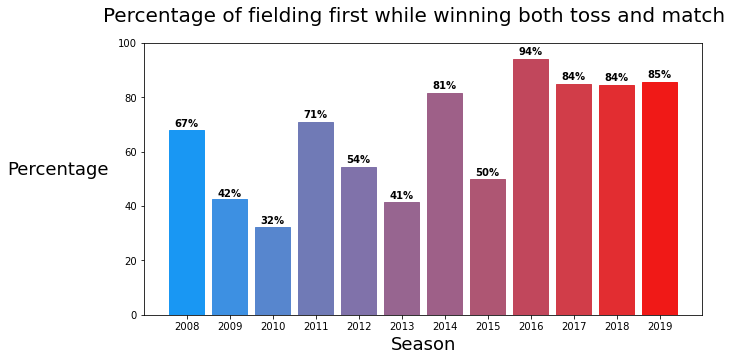

In [29]:
toss_field_first=matches[(matches['toss_winner']==matches['winner']) & (matches['toss_decision']=='field')]
toss_field_first_season=toss_field_first.groupby('season')['season'].count()
win_perc=[]

for i in seasons:
    win_perc.append((toss_field_first_season[i]/toss_match_winner_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,100)
rects=plt.bar(seasons,win_perc)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.01*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')
for i in range(12):
    rects[i].set_color(season_colors[i])
    
fig.suptitle('Percentage of fielding first while winning both toss and match',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

### Plotting a historical bar graph on what percentage each team won the matches when they had won the toss and selected to bat first

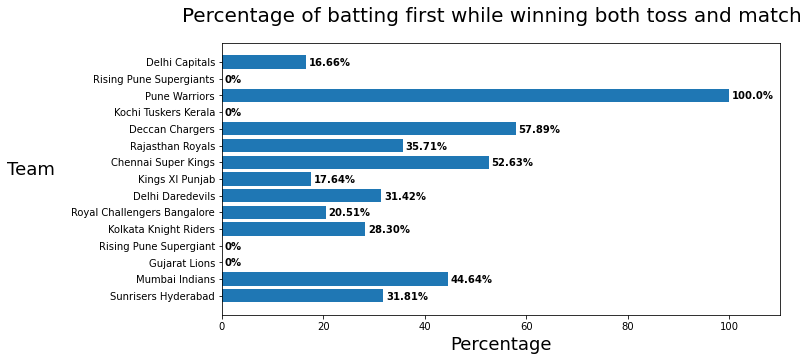

In [30]:
toss_batting_first=matches[(matches['toss_winner']==matches['winner']) & (matches['toss_decision']=='bat')]
toss_batting_first_team=toss_batting_first.groupby('toss_winner')['toss_winner'].count()
win_perc=[]
for i in teams:
    if i in toss_batting_first_team.keys() and i in toss_match_winner_team.keys():
        win_perc.append((toss_batting_first_team[i]/toss_match_winner_team[i])*100)
    else:
        win_perc.append(0)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,110)
rects=plt.barh(teams,win_perc)

for i, v in enumerate(win_perc):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage of batting first while winning both toss and match',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)


plt.show()

### Plotting a historical bar graph on what percentage each team won the matches when they had won the toss and selected to field first

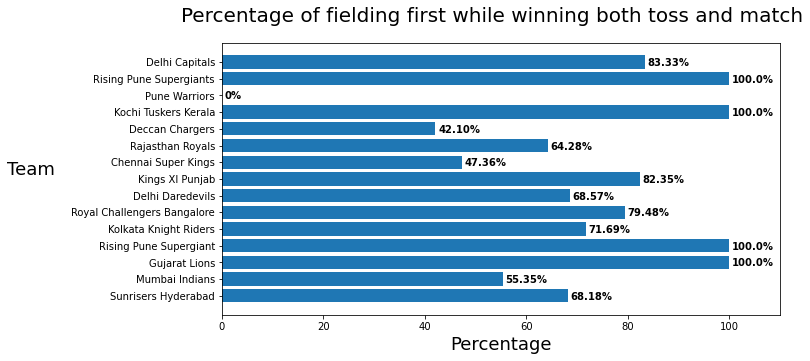

In [31]:
toss_field_first=matches[(matches['toss_winner']==matches['winner']) & (matches['toss_decision']=='field')]
toss_field_first_season=toss_field_first.groupby('toss_winner')['toss_winner'].count()
win_perc=[]

for i in teams:
    if i in toss_field_first_season.keys() and i in toss_match_winner_team.keys():
        win_perc.append((toss_field_first_season[i]/toss_match_winner_team[i])*100)
    else:
        win_perc.append(0)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,110)
rects=plt.barh(teams,win_perc)

for i, v in enumerate(win_perc):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage of fielding first while winning both toss and match',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)


plt.show()

In [32]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,wicket
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0


### Plotting a bar graph Average runs scored per each over

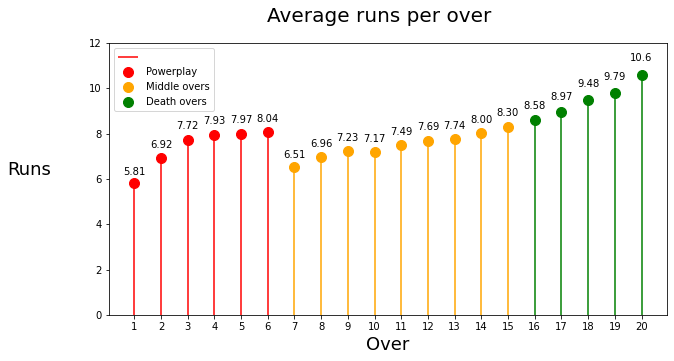

In [33]:
total_matches=len(df_deliveries['match_id'].unique())
overs=df_deliveries['over'].unique()
over_bowled=df_deliveries.groupby('over')['over'].count()/6
over_runs=df_deliveries.groupby('over').agg({'total_runs': 'sum'}).total_runs
rpo=over_runs/over_bowled

fig=plt.figure(figsize=(10,5))
plt.ylim(0,12)
rects=plt.bar(rpo.keys(),rpo.values,width=0)
plt.xticks(rpo.keys())

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(height)[:4],ha='center', va='bottom',color='black')

plt.vlines(rpo.keys(),0,rpo.values,color=over_colors,linestyles='solid')
plt.scatter(rpo.keys()[:6],rpo.values[:6], marker="o",s=100,color="red")
plt.scatter(rpo.keys()[6:15],rpo.values[6:15], marker="o",s=100,color="orange")
plt.scatter(rpo.keys()[15:],rpo.values[15:], marker="o",s=100,color="green")
    
    
fig.suptitle('Average runs per over',fontsize=20)
plt.xlabel('Over', fontsize=18)
plt.ylabel('Runs', fontsize=18,rotation=0,labelpad=60)

plt.legend(["", "Powerplay","Middle overs","Death overs"])
plt.show()

### Plotting a bar graph Average wickets taken per each over

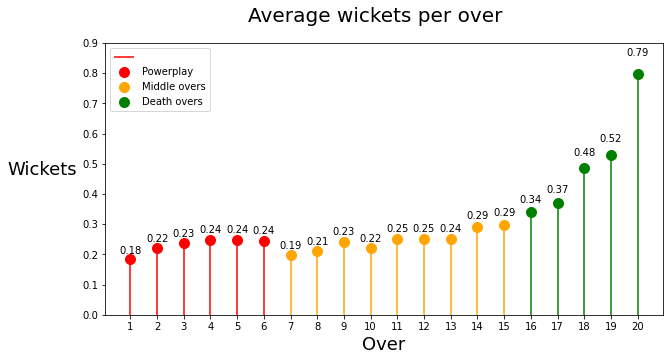

In [34]:
over_wickets=df_deliveries.groupby('over').agg({'wicket': 'sum'}).wicket
wpo=over_wickets/over_bowled

fig=plt.figure(figsize=(10,5))
plt.ylim(0,0.9)
rects=plt.bar(wpo.keys(),wpo.values,width=0)
plt.xticks(wpo.keys())

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.07*height, str(height)[:4],ha='center', va='bottom',color='black')

plt.vlines(wpo.keys(),0,wpo.values,color=over_colors,linestyles='solid')
plt.scatter(wpo.keys()[:6],wpo.values[:6], marker="o",s=100,color="red")
plt.scatter(wpo.keys()[6:15],wpo.values[6:15], marker="o",s=100,color="orange")
plt.scatter(wpo.keys()[15:],wpo.values[15:], marker="o",s=100,color="green")
    
    
fig.suptitle('Average wickets per over',fontsize=20)
plt.xlabel('Over', fontsize=18)
plt.ylabel('Wickets', fontsize=18,rotation=0,labelpad=40)

plt.legend(["", "Powerplay","Middle overs","Death overs"])
plt.show()


In [35]:
from matplotlib.colors import rgb2hex

### plotting a historical bar graph for Top 20 players who has bowled most number of wides 

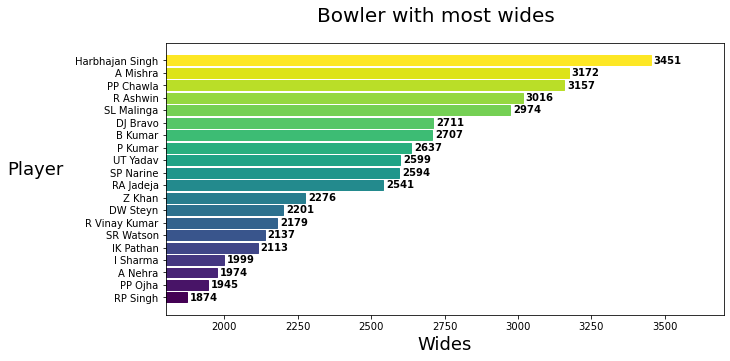

In [36]:
#Bowler with most wides
bowler_wides=df_deliveries.groupby('bowler').agg({'bowler':'count'}).bowler
bmw=bowler_wides.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(1800,3700)
rects=plt.barh(bmw.keys(),bmw.values)

for i, v in enumerate(bmw.values):
    ax.text(v+10 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle("Bowler with most wides",fontsize=20)
plt.xlabel('Wides', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = plt.get_cmap('viridis', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()